In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [23]:
def plot_comparison_boxplot(dataframes, dataset_names, title="Comparison of Dice Scores Across Methods"):
    """
    Creates comparison boxplots for multiple datasets, keeping the same color for each tissue type.
    
    Args:
        dataframes (list of pd.DataFrame): List of dataframes containing Dice scores for 'CSF', 'WM', 'GM', 
                                           and an 'Image' column.
        dataset_names (list of str): List of names corresponding to each dataset.
        title (str): Title for the plot.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Combine dataframes into a single dataframe for plotting
    combined_df = pd.DataFrame()
    for df, name in zip(dataframes, dataset_names):
        melted_df = df.melt(id_vars=['Image'], value_vars=['CSF', 'WM', 'GM'], 
                            var_name='Tissue', value_name='Dice Score')
        melted_df['Dataset'] = name  # Add dataset name as a column
        combined_df = pd.concat([combined_df, melted_df], ignore_index=True)

    # Define a color palette for the datasets (hue)
    dataset_palette = sns.color_palette("Set2", len(dataset_names))

    # Plot boxplots
    plt.figure(figsize=(9, 6))
    sns.boxplot(data=combined_df, x='Tissue', y='Dice Score', hue='Dataset', palette=dataset_palette, width=0.7)
    plt.title(title)
    plt.ylabel("Dice Score")
    plt.xlabel("Tissue Type")
    
    # Adjust legend
    plt.legend(title="Method", loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

In [10]:
df_em_lp = pd.read_csv('EM_LP\\em_lp_dice_scores.csv')
df_em_tm = pd.read_csv('EM+TM\\em_tm_dice_scores.csv')
df_em_tm_lp = pd.read_csv('EM+TM+LP\\DiceScores.csv')
df_tm_lp = pd.read_csv('TM+LP\\DiceScores.csv')

In [15]:
df_tm_lp

,Image,CSF,WM,GM
0,test_set\testing-images\1003.nii.gz,0.685848,0.821860,0.909605
1,test_set\testing-images\1004.nii.gz,0.893904,0.913280,0.941425
2,test_set\testing-images\1005.nii.gz,0.826499,0.879321,0.924875
3,test_set\testing-images\1018.nii.gz,0.850328,0.847674,0.917920
4,test_set\testing-images\1024.nii.gz,0.876786,0.907621,0.940945
5,test_set\testing-images\1025.nii.gz,0.809133,0.879044,0.933066
6,test_set\testing-images\1038.nii.gz,0.887079,0.903859,0.939734
7,test_set\testing-images\1101.nii.gz,0.888470,0.900177,0.938903
8,test_set\testing-images\1104.nii.gz,0.869655,0.858387,0.927122
9,test_set\testing-images\1107.nii.gz,0.857243,0.834477,0.917042


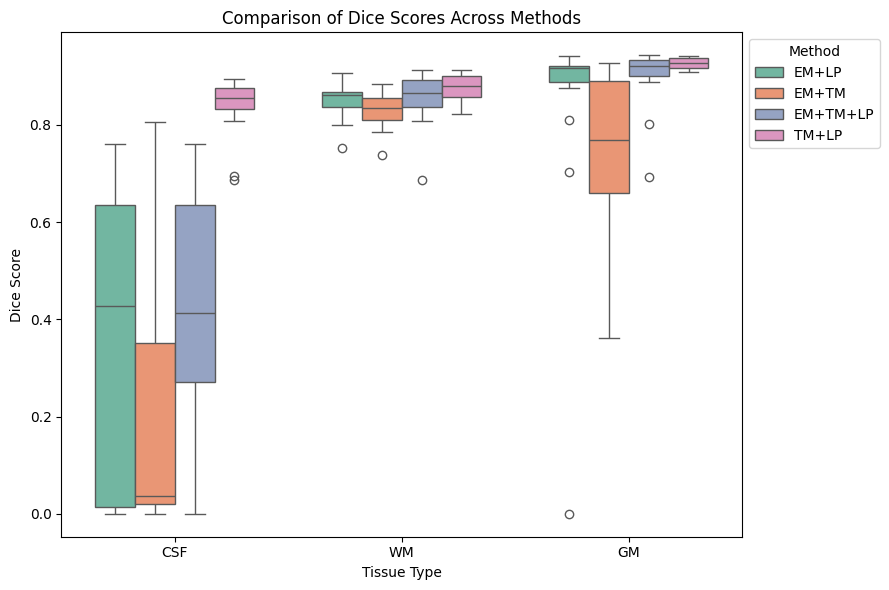

In [24]:
# Plot comparison boxplot
plot_comparison_boxplot([df_em_lp, df_em_tm, df_em_tm_lp, df_tm_lp], 
                        dataset_names=['EM+LP', 'EM+TM', 'EM+TM+LP', 'TM+LP'],
                        title="Comparison of Dice Scores Across Methods")

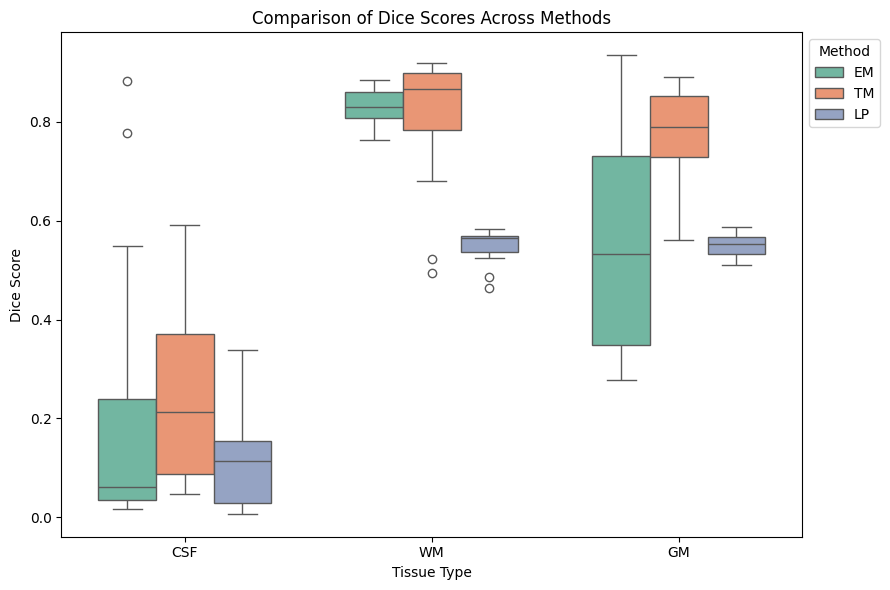

In [28]:
df_em = pd.read_csv('EM\\DiceScores.csv')
df_tm = pd.read_csv('TM\\dice_score_table.csv')
df_lp = pd.read_csv('LP\\metrics_lp_df.csv')

plot_comparison_boxplot([df_em, df_tm, df_lp], dataset_names=['EM', 'TM', 'LP'], title="Comparison of Dice Scores Across Methods")

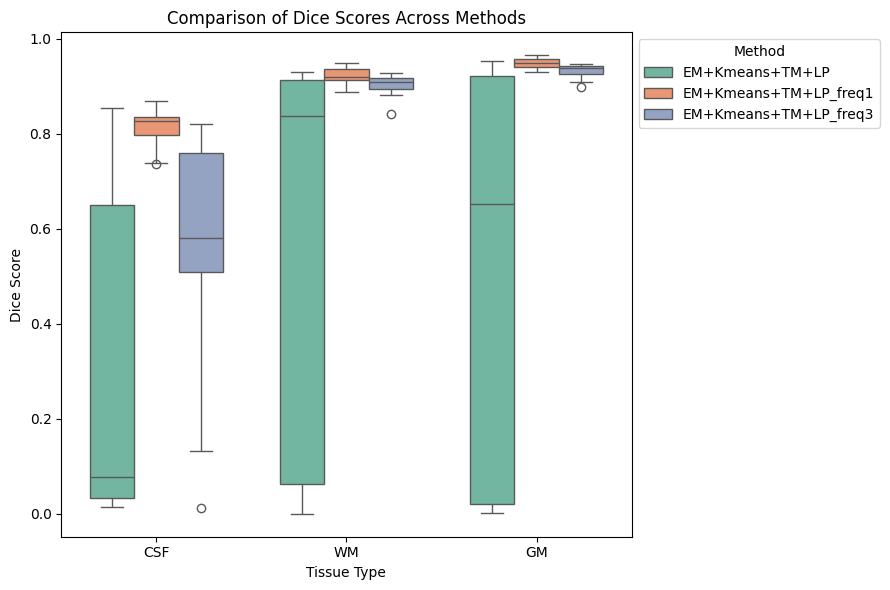

In [27]:
# Plot comparison boxplot
df_em_with_kmeans_lp_tm = pd.read_csv('EM+Kmeans+TM+LP\\DiceScores.csv')
df_em_with_kmeans_lp_tm_freq1 = pd.read_csv('EM+Kmeans+TM+LP\\DiceScores_aposteriori.csv')
df_em_with_kmeans_lp_tm_freq3 = pd.read_csv('EM+Kmeans+TM+LP\\DiceScores_aposteriori_freq3.csv')

plot_comparison_boxplot([df_em_with_kmeans_lp_tm, df_em_with_kmeans_lp_tm_freq1, df_em_with_kmeans_lp_tm_freq3], dataset_names=['EM+Kmeans+TM+LP', 'EM+Kmeans+TM+LP_freq1', 'EM+Kmeans+TM+LP_freq3'], title="Comparison of Dice Scores Across Methods")

In [ ]:
# Create a combined dataframe for showing mean Dice scores for each method
combined_df = pd.concat([df_em_lp, df_em_tm, df_em_tm_lp, df_tm_lp, df_em, df_lp, df_tm, df_em_with_kmeans_lp_tm, df_em_with_kmeans_lp_tm_freq1, df_em_with_kmeans_lp_tm_freq3], ignore_index=True)



,Image,CSF,WM,GM
0,test_set\testing-images\1003.nii.gz,0.021814,0.892274,0.000026
1,test_set\testing-images\1004.nii.gz,0.015443,0.825536,0.703175
2,test_set\testing-images\1005.nii.gz,0.749807,0.865415,0.920561
3,test_set\testing-images\1018.nii.gz,0.000000,0.861131,0.918374
4,test_set\testing-images\1024.nii.gz,0.014216,0.850097,0.810170
...,...,...,...,...
174,test_set\testing-images\1116.nii.gz,0.752271,0.910106,0.932927
175,test_set\testing-images\1119.nii.gz,0.772046,0.894185,0.914131
176,test_set\testing-images\1122.nii.gz,0.760582,0.886619,0.909477
177,test_set\testing-images\1125.nii.gz,0.803674,0.894743,0.912272


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_11928\332560151.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


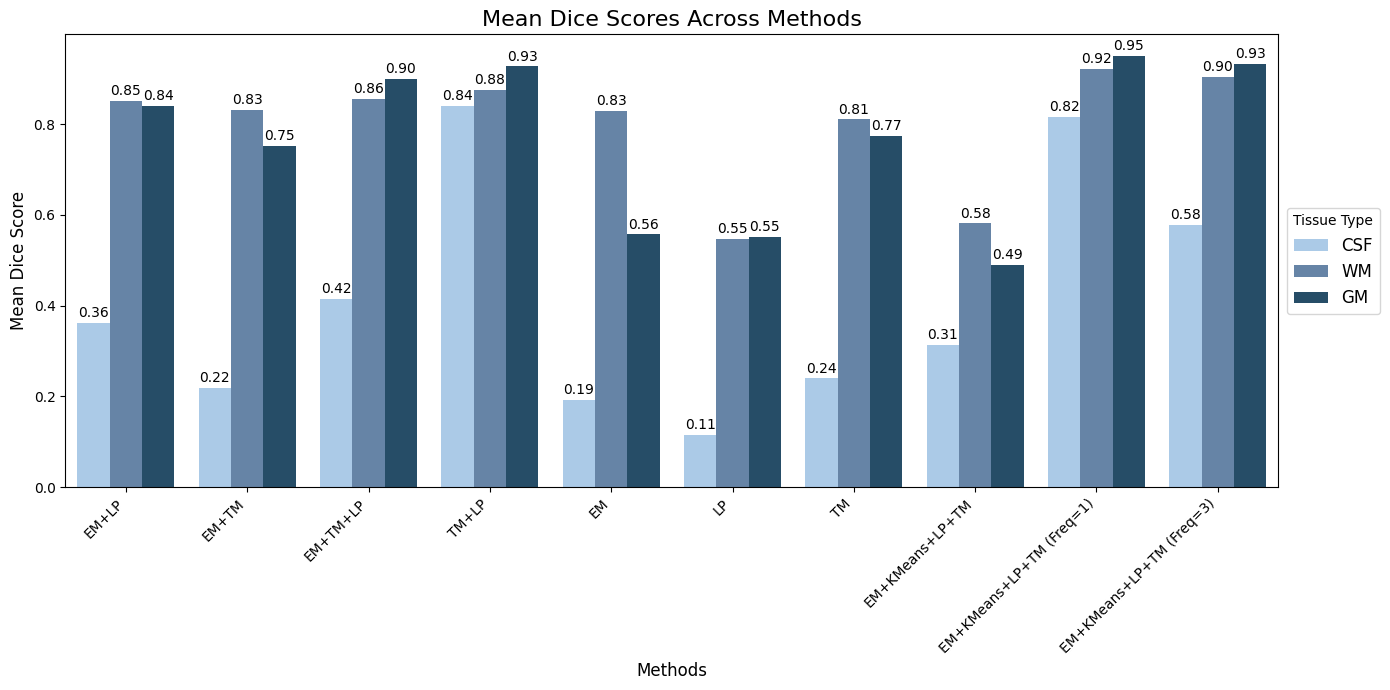

In [37]:
# Assuming these dataframes are already loaded
dataframes = {
    "EM+LP": df_em_lp,
    "EM+TM": df_em_tm,
    "EM+TM+LP": df_em_tm_lp,
    "TM+LP": df_tm_lp,
    "EM": df_em,
    "LP": df_lp,
    "TM": df_tm,
    "EM+KMeans+LP+TM": df_em_with_kmeans_lp_tm,
    "EM+KMeans+LP+TM (Freq=1)": df_em_with_kmeans_lp_tm_freq1,
    "EM+KMeans+LP+TM (Freq=3)": df_em_with_kmeans_lp_tm_freq3
}

# Calculate means for each method and tissue type
mean_dice_scores = {
    method: {
        "CSF": df["CSF"].mean(),
        "WM": df["WM"].mean(),
        "GM": df["GM"].mean()
    }
    for method, df in dataframes.items()
}

# Convert to a DataFrame for easier manipulation
mean_dice_df = pd.DataFrame(mean_dice_scores).T  # Transpose to have methods as rows
mean_dice_df = mean_dice_df.reset_index().rename(columns={"index": "Method"})

# Melt the DataFrame for Seaborn compatibility
mean_dice_melted = mean_dice_df.melt(id_vars="Method", var_name="Tissue", value_name="Mean Dice Score")

# Set a custom palette with improved contrast
custom_palette = sns.color_palette(["#A1CAF1", "#5B84B1FF", "#1B4F72"])  # Light blue, medium blue, dark blue
sns.set_palette(custom_palette)

# Plot grouped bar chart
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=mean_dice_melted,
    x="Method",
    y="Mean Dice Score",
    hue="Tissue",
    dodge=True,
    ci=None
)

# Add exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=2)

# Customize plot
ax.set_title("Mean Dice Scores Across Methods", fontsize=16)
ax.set_xlabel("Methods", fontsize=12)
ax.set_ylabel("Mean Dice Score", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Move legend to the side
ax.legend(title="Tissue Type", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [40]:
mean_dice_df['Average'] = mean_dice_df[['CSF', 'WM', 'GM']].mean(axis=1)
mean_dice_df

,Method,CSF,WM,GM,Average
0,EM+LP,0.361700,0.851151,0.840650,0.684500
1,EM+TM,0.218741,0.830296,0.751333,0.600123
2,EM+TM+LP,0.415227,0.855078,0.900241,0.723515
3,TM+LP,0.839214,0.875845,0.926913,0.880657
4,EM,0.192667,0.828593,0.556681,0.525980
5,LP,0.114941,0.547646,0.551380,0.404656
6,TM,0.239442,0.810449,0.773603,0.607832
7,EM+KMeans+LP+TM,0.313635,0.580949,0.489665,0.461416
8,EM+KMeans+LP+TM (Freq=1),0.815420,0.921860,0.950164,0.895815
9,EM+KMeans+LP+TM (Freq=3),0.577208,0.904329,0.932111,0.804549
